In [16]:
import math

PADDING_SIZE = 15
VOCAB_SIZE = 3000
VECTOR_DIMS = math.ceil(VOCAB_SIZE**(1/4))
LEARNING_RATE = 0.0001
EPOCHS = 64

In [2]:
import itertools

import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

data = tfds.load('sentiment140', split=None)

for i in itertools.islice(iter(data['train']), 20):
    print(int(i['polarity']), i['text'].numpy().decode('utf-8'))

4 i'm 10x cooler than all of you! 
0 O.kk? Thats weird I cant stop following people on twitter... I have tons of people to unfollow 
4 what a beautiful day not to got to my first class 
4 .@HildyGottlieb &amp; I was just saying to Maha'al yesterday, everything we ever needed to know was in Beatles' lyrics - you prove my point! 
0 kinda sad and confused  why do guys do this?
4 @Real_DavidCook YES &amp; YES 
4 @GDGOfficial But it's another beautiful day here in europe, you have to make the most of it  Rock the house again tonight!
0 Working through hundreds of assignments 
0 driving with the moonroof and windows open is THE BEST THING IN THE WORLD. Sitting on the couch with @melissasmirn she hates my hamster 
0 @scott_mills Gutted! I worked for the fringe last year, won't be back this year 
4 Is in the garden in shorts with the rabbit 
0 So gloomy  I wish I was still in bed sleeping
4 Watching The Hills Finale! I love The Hills  .. and Lauren looked so pretty on the red carpet at the MTV

In [3]:
import string

stopwords = [
    'amp', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours',
    'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
    'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom',
    'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but',
    'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
    'by', 'for', 'with', 'about', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from',
    'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'further', 'then', 'once', 'here', 'there', 'when',
    'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
    'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only',
    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'should', 'now', 'im'
]
table = str.maketrans('', '', string.punctuation)

sentences = [
    [
        word
        for word in item['text']
            .numpy().decode('utf-8')
            .lower().translate(table)
            .split()
        if word not in stopwords
    ]
    for item in data['train']
]
labels = np.array([int(item['polarity'])//4 for item in data['train']])

training_sentences, testing_sentences = sentences[:1300000], sentences[1300000:]
training_labels, testing_labels = labels[:1300000], labels[1300000:]

for s, p in zip(training_sentences[:20], training_labels[:20]):
    print(p, s)

1 ['10x', 'cooler']
0 ['okk', 'thats', 'weird', 'cant', 'stop', 'following', 'people', 'twitter', 'tons', 'people', 'unfollow']
1 ['beautiful', 'day', 'not', 'got', 'first', 'class']
1 ['hildygottlieb', 'saying', 'mahaal', 'yesterday', 'everything', 'ever', 'needed', 'know', 'beatles', 'lyrics', 'prove', 'point']
0 ['kinda', 'sad', 'confused', 'guys']
1 ['realdavidcook', 'yes', 'yes']
1 ['gdgofficial', 'another', 'beautiful', 'day', 'europe', 'make', 'rock', 'house', 'tonight']
0 ['working', 'hundreds', 'assignments']
0 ['driving', 'moonroof', 'windows', 'open', 'best', 'thing', 'world', 'sitting', 'couch', 'melissasmirn', 'hates', 'hamster']
0 ['scottmills', 'gutted', 'worked', 'fringe', 'last', 'year', 'wont', 'back', 'year']
1 ['garden', 'shorts', 'rabbit']
0 ['gloomy', 'wish', 'still', 'bed', 'sleeping']
1 ['watching', 'hills', 'finale', 'love', 'hills', 'lauren', 'looked', 'pretty', 'red', 'carpet', 'mtv', 'movie', 'awards']
0 ['want', 'summer', 'back']
1 ['boostmobile', 'youre', 

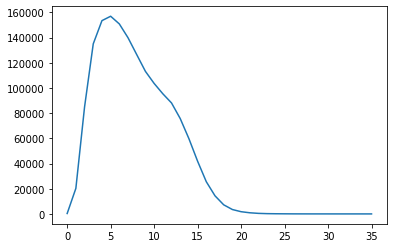

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

plt.plot([t[1] for t in sorted(Counter([len(s) for s in sentences]).items())])

In [6]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE, oov_token='<|OOV|>')
tokenizer.fit_on_texts(sentences)

tokenized_training_sentences, tokenized_testing_sentences = (
    np.asarray(tf.keras.preprocessing.sequence.pad_sequences(
        tokenizer.texts_to_sequences(training_sentences), PADDING_SIZE)),
    np.asarray(tf.keras.preprocessing.sequence.pad_sequences(
        tokenizer.texts_to_sequences(testing_sentences), PADDING_SIZE))
)

for s in tokenized_training_sentences[:20]:
    print(s)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
[   0    0    0    0    1   43  566   13  246  316   73   42 1786   73
    1]
[  0   0   0   0   0   0   0   0   0 224   4   2  14  89 331]
[   0    0    0    1  602    1  206  284  134  798   20    1 2424    1
  681]
[   0    0    0    0    0    0    0    0    0    0    0  329   46 1072
  117]
[ 0  0  0  0  0  0  0  0  0  0  0  0  1 81 81]
[   0    0    0    0    0    0    1  112  224    4 1856   58  503  131
   56]
[   0    0    0    0    0    0    0    0    0    0    0    0   90    1
 2822]
[   0    0    0  621    1 1040  447   93  111  213  362 1428    1  828
    1]
[   0    0    0    0    0    0    1 1148  782    1   36  164  102   16
  164]
[   0    0    0    0    0    0    0    0    0    0    0    0  792 2306
    1]
[   0    0    0    0    0    0    0    0    0    0 2659   48   24   70
  469]
[   0    0   66 1117 1355   11 1117 1980  733  133  484    1  688  132
  603]
[  0   0   0   0   0   0   0   0   0   0   0   0  25 142  16]
[  0   0   0   0 

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(VOCAB_SIZE, VECTOR_DIMS),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dense(VECTOR_DIMS, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid"),
]);
model.compile(
  optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
  loss = "binary_crossentropy",
  metrics = ["acc"],
);
print(model.summary());

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 8)           24000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 24,081
Trainable params: 24,081
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
#7868
history = model.fit(
    tokenized_training_sentences, training_labels,
    validation_data=(tokenized_testing_sentences, testing_labels),
    epochs=EPOCHS
)
model.save('model.h5')

Epoch 1/100
40625/40625 [==============================] - 102s 3ms/step - loss: 0.4481 - acc: 0.7868 - val_loss: 0.4603 - val_acc: 0.7797
Epoch 2/100
40625/40625 [==============================] - 102s 3ms/step - loss: 0.4479 - acc: 0.7870 - val_loss: 0.4606 - val_acc: 0.7796
Epoch 3/100
40625/40625 [==============================] - 102s 3ms/step - loss: 0.4478 - acc: 0.7871 - val_loss: 0.4606 - val_acc: 0.7798
Epoch 4/100
40625/40625 [==============================] - 102s 3ms/step - loss: 0.4477 - acc: 0.7871 - val_loss: 0.4608 - val_acc: 0.7794
Epoch 5/100
40625/40625 [==============================] - 102s 3ms/step - loss: 0.4476 - acc: 0.7871 - val_loss: 0.4606 - val_acc: 0.7794
Epoch 6/100
40625/40625 [==============================] - 102s 3ms/step - loss: 0.4475 - acc: 0.7874 - val_loss: 0.4604 - val_acc: 0.7798
Epoch 7/100
40625/40625 [==============================] - 102s 3ms/step - loss: 0.4474 - acc: 0.7873 - val_loss: 0.4607 - val_acc: 0.7795
Epoch 8/100
40625/40625 [==

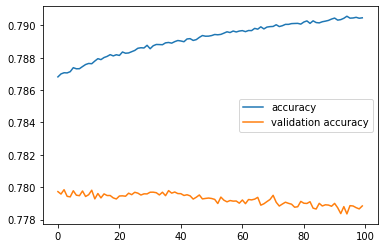

In [15]:
#plt.plot(history.history["loss"], label = "loss");
#plt.plot(history.history["val_loss"], label = "validation loss");
plt.plot(history.history["acc"], label = "accuracy");
plt.plot(history.history["val_acc"], label = "validation accuracy");
plt.savefig("history.svg");
plt.legend();

In [12]:
while True:
    percentage = model.predict(
        tf.keras.preprocessing.sequence.pad_sequences(
            tokenizer.texts_to_sequences([
                input().lower().translate(table).split()
            ]), PADDING_SIZE
        )
    )[0][0]
    if percentage >= .5:
        print(f'I think what you entered was positive, with a {percentage*100:.3g}% confidence.')
    else:
        print(f'I think what you entered was negative, with a {(1-percentage)*100:.3g}% confidence.')

KeyboardInterrupt: Interrupted by user